<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Edge-Detection:-Prewitt" data-toc-modified-id="Edge-Detection:-Prewitt-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Edge Detection: Prewitt</a></span></li></ul></div>

## Edge Detection: Prewitt

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

In [12]:
def convolve_np(X, F):
    X_height = X.shape[0]
    X_width = X.shape[1]

    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = int((F_height - 1) / 2)
    W = int((F_width - 1) / 2)
    
    out = np.zeros((X_height, X_width))
    
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
        
    return out

In [13]:
img = cv2.imread('images/jet.jpg', cv2.IMREAD_GRAYSCALE)
img_out = img.copy()
print(img.dtype)
height = img.shape[0]
width = img.shape[1]
print('height=',height,'width = ',width)

uint8
height= 480 width =  640


In [14]:
Hx = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]])

Hy = np.array([[-1, -1, -1],
               [0, 0, 0],
               [1, 1, 1]])

In [16]:
img_x = convolve_np(img, Hx) / 6.0
img_y = convolve_np(img, Hy) / 6.0

img_out = np.sqrt(np.power(img_x, 2) + np.power(img_y, 2))
img_out = (img_out / np.max(img_out)) * 255

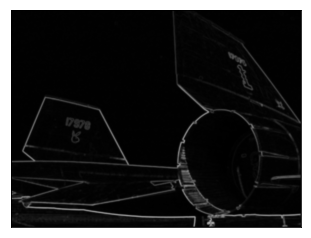

In [6]:
#cv2.imwrite('images/edge_prewitt.jpg', img_out)

plt.imshow(img_out, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

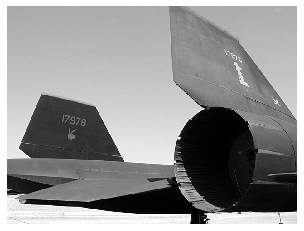

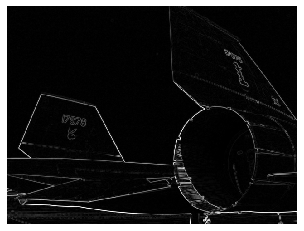

In [18]:
plt.figure()
plt.imshow(img,'gray')
plt.axis('off')
plt.figure()
plt.imshow(img_out,'gray')
plt.axis('off')
plt.show()